In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
data_frame = pd.read_csv(data_path)

# Define key numerical columns
num_features = ['Balance', 'CreditScore']

# Compute descriptive statistics
stats_summary = data_frame[num_features].describe().T
stats_summary['Skew'] = data_frame[num_features].skew()
stats_summary['Kurtosis'] = data_frame[num_features].kurtosis()
print(stats_summary)



               count          mean           std    min    25%       50%  \
Balance      10000.0  76485.889288  62397.405202    0.0    0.0  97198.54   
CreditScore  10000.0    650.528800     96.653299  350.0  584.0    652.00   

                   75%        max      Skew  Kurtosis  
Balance      127644.24  250898.09 -0.141109 -1.489412  
CreditScore     718.00     850.00 -0.071607 -0.425726  


<ipython-input-2-46494ecb61cb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_frame[feature], palette='magma')


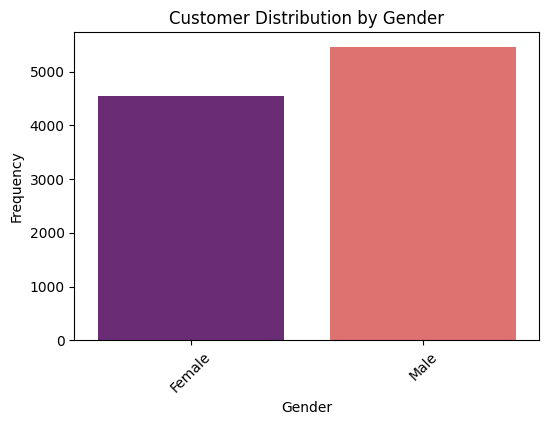

<ipython-input-2-46494ecb61cb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_frame[feature], palette='magma')


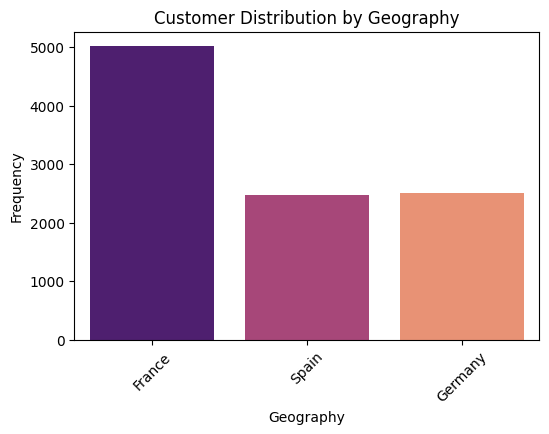

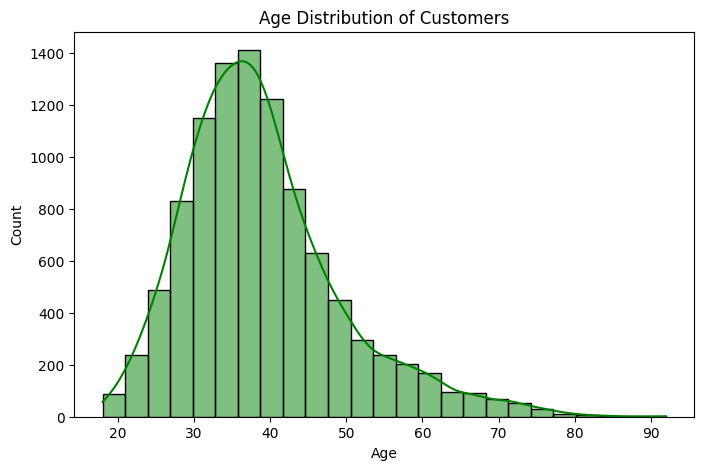

In [2]:
# Plot categorical distributions
category_features = ['Gender', 'Geography']
for feature in category_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data_frame[feature], palette='magma')
    plt.title(f'Customer Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plot histogram for Age
target_col = 'Age'
plt.figure(figsize=(8, 5))
sns.histplot(data_frame[target_col], bins=25, kde=True, color='green')
plt.title(f'{target_col} Distribution of Customers')
plt.xlabel(target_col)
plt.ylabel('Count')
plt.show()


In [3]:
# Group statistics based on activity level
activity_feature = 'NumOfProducts'
activity_stats = data_frame.groupby('IsActiveMember')[activity_feature].agg(['min', 'max', 'mean'])
activity_stats.columns = ['Min_Products', 'Max_Products', 'Avg_Products']
print(activity_stats)

                Min_Products  Max_Products  Avg_Products
IsActiveMember                                          
0                          1             4      1.524438
1                          1             4      1.535624


In [4]:
# Compute correlation matrix
selected_features = ['CreditScore', 'Balance', 'NumOfProducts']
corr_matrix = data_frame[selected_features].corr()
print("Feature Correlation Matrix:\n", corr_matrix)

Feature Correlation Matrix:
                CreditScore   Balance  NumOfProducts
CreditScore       1.000000  0.006268       0.012238
Balance           0.006268  1.000000      -0.304180
NumOfProducts     0.012238 -0.304180       1.000000


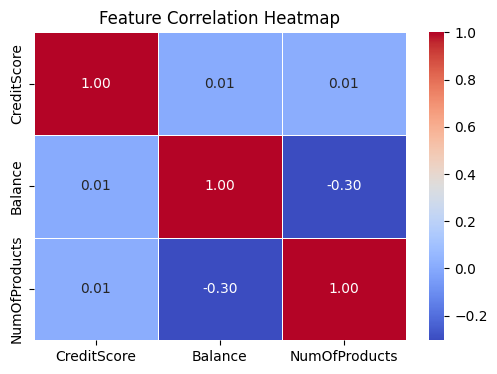

In [5]:
# Heatmap visualization
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

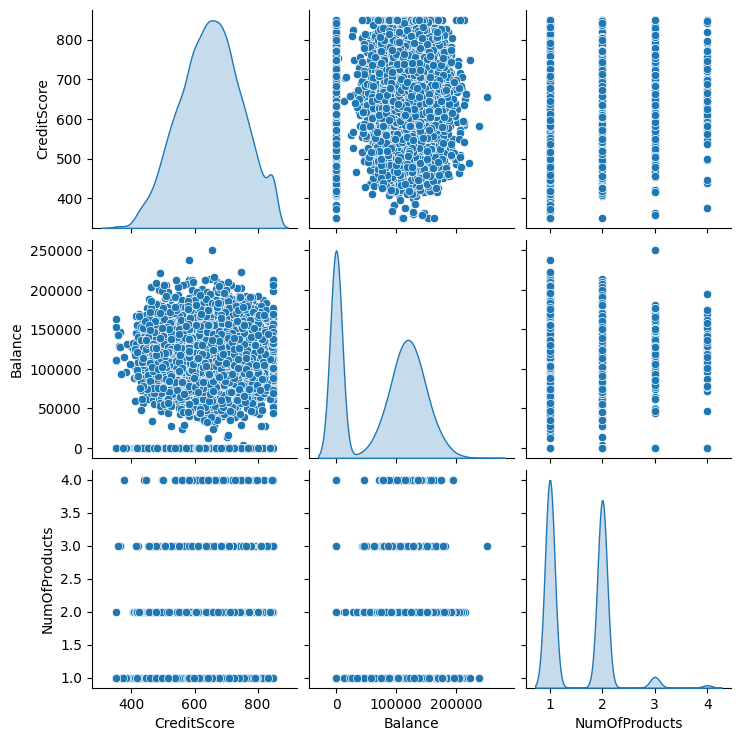

In [6]:
# Pairplot visualization
sns.pairplot(data_frame[selected_features], diag_kind='kde')
plt.show()

Customer Churn Analysis:
         Balance_Mean  Balance_Median  Balance_Min  Balance_Max  Products_Mean  \
Exited                                                                          
0       72742.750663        92063.06          0.0    221532.80       1.544210   
1       91109.476006       109344.23          0.0    250898.09       1.475466   

        Products_Median  Products_Min  Products_Max  
Exited                                               
0                   2.0             1             3  
1                   1.0             1             4  


<ipython-input-7-6e9183157fee>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_frame[churn_feature], y=data_frame['Balance'], palette='coolwarm')


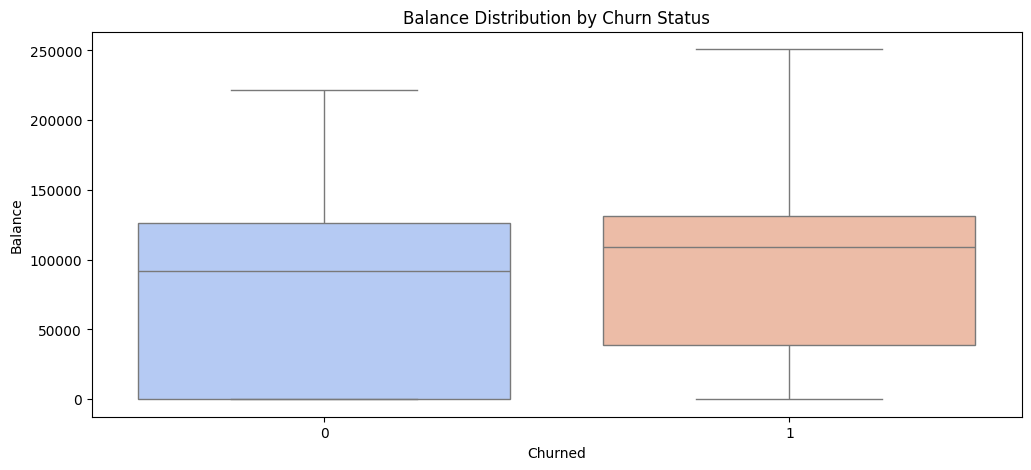

In [7]:
# Group statistics based on customer churn
churn_feature = 'Exited'
churn_analysis = data_frame.groupby(churn_feature)[['Balance', activity_feature]].agg(['mean', 'median', 'min', 'max'])
churn_analysis.columns = ['Balance_Mean', 'Balance_Median', 'Balance_Min', 'Balance_Max',
                          'Products_Mean', 'Products_Median', 'Products_Min', 'Products_Max']
print("Customer Churn Analysis:\n", churn_analysis)

# Boxplot for balance comparison
plt.figure(figsize=(12, 5))
sns.boxplot(x=data_frame[churn_feature], y=data_frame['Balance'], palette='coolwarm')
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Churned')
plt.ylabel('Balance')
plt.show()


In [8]:
# Probability analysis for low credit score and high balance
credit_threshold = 600  # Threshold for low credit score
median_balance = data_frame['Balance'].median()
low_credit_condition = data_frame['CreditScore'] < credit_threshold
high_balance_condition = data_frame['Balance'] > median_balance
combined_condition = low_credit_condition & high_balance_condition

probability_event = combined_condition.sum() / len(data_frame)
print(f"Probability of a customer having both low credit score and high balance: {probability_event:.4f}")

Probability of a customer having both low credit score and high balance: 0.1499
